<a href="https://colab.research.google.com/github/mountechsolutions/ml-with-titanic-dataset/blob/sujanad/Machine_Learning_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Essential package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#visualization package
import seaborn as sns

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm,tree
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Workshop-mldsn"

train_and_test2.csv


In [4]:
df = pd.read_csv('/content/drive/My Drive/Workshop-mldsn/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [7]:
df1=df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8',
            'zero.9','zero.10','zero.11','zero.12','zero.13',
            'zero.14','zero.15','zero.16','zero.17','zero.18','Embarked','Parch'],axis=1)

In [8]:
df1.rename(columns={'2urvived':'Survived'}, inplace=True)

In [9]:
df1.head()

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Survived
0,1,22.0,7.2500,0,1,3,0
1,2,38.0,71.2833,1,1,1,1
2,3,26.0,7.9250,1,0,3,1
3,4,35.0,53.1000,1,1,1,1
4,5,35.0,8.0500,0,0,3,0


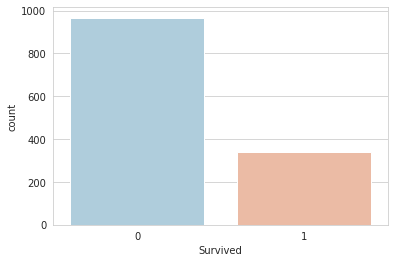

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df1,palette='RdBu_r')

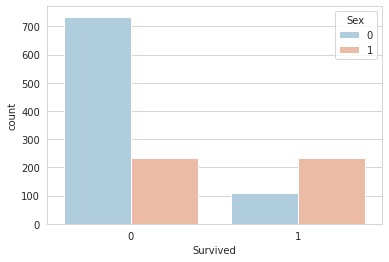

In [11]:
sns.countplot(x='Survived',data=df1, palette='RdBu_r',hue='Sex')

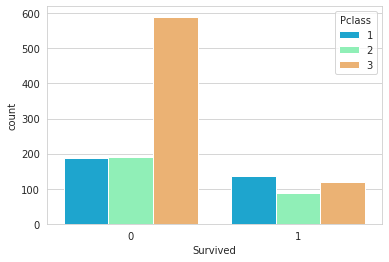

In [12]:
sns.countplot(x='Survived',data=df1,palette='rainbow',hue='Pclass')

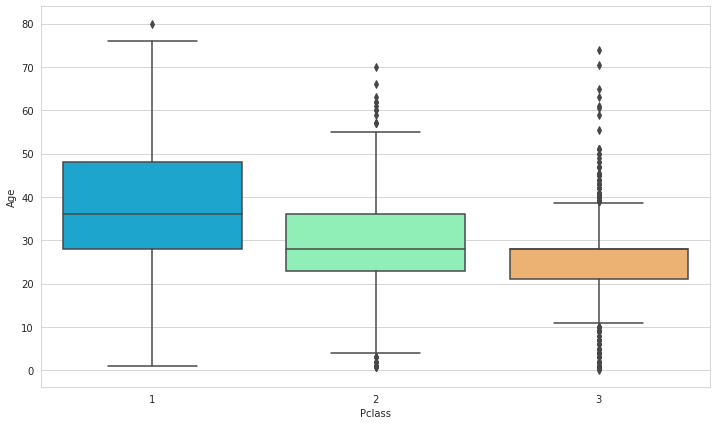

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df1,palette='rainbow')

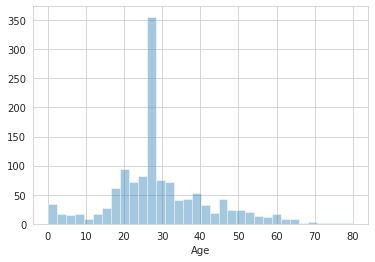

In [14]:
sns.distplot(df1['Age'],kde=False)

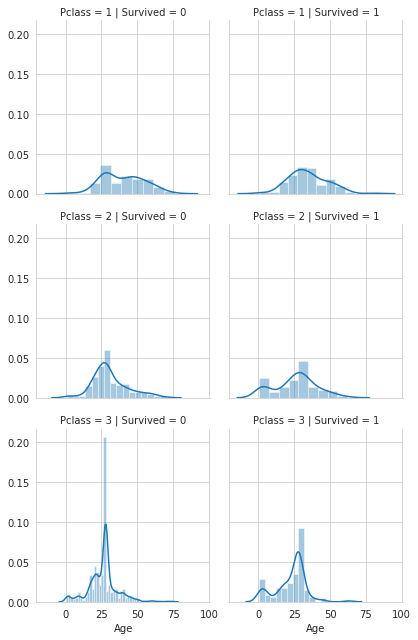

In [15]:
g = sns.FacetGrid(data=df1,col='Survived',row='Pclass')
g.map(sns.distplot,'Age')

Text(0.5, 1.0, 'Age Distribution on Survival')

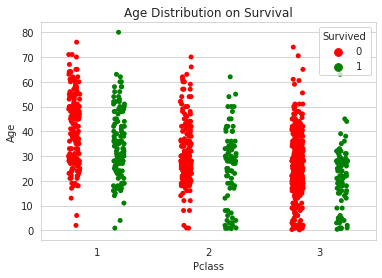

In [16]:
sns.stripplot(x='Pclass',y='Age',data=df1,jitter=True,hue='Survived',palette=['r','g'],dodge=True).set_title('Age Distribution on Survival')

**Machine Learning**

In [41]:
#Train test split
x=df1[['Passengerid',	'Age',	'Fare',	'Sex',	'sibsp',	'Pclass']]
y=df1['Survived']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=101000)

In [42]:
#model training
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

#SVM model train
svmmodel=svm.SVC()
svmmodel.fit(X_train, y_train)
predictions1 = svmmodel.predict(X_test)
print(classification_report(y_test,predictions1))


              precision    recall  f1-score   support

           0       0.75      0.99      0.85       484
           1       0.56      0.05      0.10       171

    accuracy                           0.74       655
   macro avg       0.65      0.52      0.47       655
weighted avg       0.70      0.74      0.65       655



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
# model testing
#train_prediction=logmodel.predict(X_train)
#print(classification_report(y_train,train_prediction))
predictions2 = logmodel.predict(X_test)


Evaluate Model

In [44]:
#result viewing
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       484
           1       0.67      0.53      0.59       171

    accuracy                           0.81       655
   macro avg       0.76      0.72      0.73       655
weighted avg       0.80      0.81      0.80       655



**Naive Bayes Classification**

In [47]:
naive_model=GaussianNB()
naive_model.fit(X_train, y_train)
predictions3 = naive_model.predict(X_test)
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       484
           1       0.64      0.52      0.57       171

    accuracy                           0.80       655
   macro avg       0.74      0.71      0.72       655
weighted avg       0.79      0.80      0.79       655



**Decision Tree Classification**

In [49]:
dtree_model=tree.DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
predictions4 = dtree_model.predict(X_test)
print(classification_report(y_test,predictions4))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       484
           1       0.66      0.67      0.67       171

    accuracy                           0.82       655
   macro avg       0.77      0.78      0.77       655
weighted avg       0.83      0.82      0.82       655



**Plotting the result**

In [51]:
#Result matrix
confusion_matrix(y_test,predictions1)

array([[477,   7],
       [162,   9]])

In [53]:
confusion_matrix(y_test,predictions2)

array([[440,  44],
       [ 81,  90]])

In [54]:
confusion_matrix(y_test,predictions3)

array([[433,  51],
       [ 82,  89]])

In [55]:
confusion_matrix(y_test,predictions4)

array([[425,  59],
       [ 56, 115]])

In [ ]:
submission = pd.DataFrame({'Passengerid':X_test['Passengerid'],'Survived':predictions})
submission.head()